<img src="Escudo_uaustralchile.png" style="height=100px;display: block;margin-left:auto;margin-right:auto"/>

# Integrantes:
+ Kamila Gamboa (kamila dot gamboa at alumnos dot uach dot cl)
+ Valentina Valderas (valentina dot valderas at alumnos dot uach dot cl)

# Profesor y ayudante:
+ Victor Poblete
+ Esteban Vargas

# Fecha:
+ 19 de Junio del 2024

# Objetivos:
> + Explicar qué es la convolución.
> + Explicar matemáticamente como se realiza una convolución.
> + Crear un código que realice la convolución.
> + Graficar la convolución.
> + Crear un código que muestre paso por paso cómo se grafica la convolución, a medida que esta se está calculando.

# ¿Qué es la convolución?
+ La convolución superpone, matemáticamente, dos señales y se obtiene como resultado una nueva señal.
+ El sistema lineal e invariante en el tiempo (LTI) de la convolución tiene una entrada x(n), que corresponde a una señal, esta se convoluciona con una señal h(n), que corresponde a la respuesta impulso de una sala y finalmente se obtiene como salida y(n) que es la nueva señal.
+ En el caso del procesamiento digital de señales se considera el tiempo discreto.
+ El largo de la señal y(n) que se obtiene corresponde al largo de la señal x(n) más el largo de la señal h(n) menos 1. Es decir, len(y(n))=len(x(n))+len(h(n))-1

## Matemáticamente:
+ Como se utiliza tiempo discreto, se define la convolución como una sumatoria, tal como se puede ver a continuación.
\begin{align*}
y[n]&= \sum_{k=-\infty}^{\infty}  x[k] \cdot h[n-k]
\end{align*}
+ En esta sumatoria:
> + k es el índice de la sumatoria e indica la posición de la señal que se está multiplicando.
> + n es la posición del vector y que se quiere obtener.
+ Para obtener la nueva señal, se deben calcular los valores uno a uno.
+ La convolución para $ n<0 $ siempre es 0.
+ En esta sumatoria, primero se refleja h, ya que, el k es negativo y luego se posiciona según el n.
+ Posteriormente, se multiplican los valores de los vectores que coinciden y se suman.

+ Además, la convolución es conmutativa, por lo que también se puede obtener y[n] de la siguiente forma.
\begin{align*}
y[n]&= \sum_{k=-\infty}^{\infty}  h[k] \cdot x[n-k]
\end{align*}
+ De forma simple, se puede explicar la convolución como un vector de datos (señal 1), que se multiplica y suma uno a uno con otro vector de datos (señal 2) para obtener una tercera señal y[n].

### Ejemplo:
+ A continuación se muestra, mediante un ejemplo con valores, cómo se calcula la convolución matemáticamente.
> Considerando 2 señales:
> + $ x[n] = [5, 7, 0, 3, 2] $
> + $ h[n] = [1, 4] $
 
> Como se mencionó anteriormente, para $ n < 0 \rightarrow y[n] = 0 $

> Para $ n = 0 \rightarrow y[0] = 4 * 0 + 1 * 5 = 5 $\
> Para $ n = 1 \rightarrow y[1] = 4 * 5 + 1 * 7 = 27 $\
> Para $ n = 2 \rightarrow y[2] = 4 * 7 + 1 * 0 = 28 $\
> Para $ n = 3 \rightarrow y[3] = 4 * 0 + 1 * 3 = 3 $\
> Para $ n = 4 \rightarrow y[4] = 4 * 3 + 1 * 2 = 14 $\
> Para $ n = 5 \rightarrow y[5] = 4 * 2 + 1 * 0 = 8 $

> Luego, para $ n > 5 \rightarrow y[n]=0 $\
> Entonces, se obtiene una nueva señal:
> + $ y[n] = [5, 27, 28, 3, 14, 8] $

> Además, se comprueba que el largo de la señal y[n] es $ len(y[n]) = len(x[n])+len(h[n])-1 = 5+2-1 = 6$\
> En conclusión, se tiene que:
> + $ y[n]=0 $ , si $ n<0 $
> + $ y[n]=\sum_{k=-\infty}^{\infty} x[k]h[n-k] $ , si $ n=len(y[n]) $
> + $ y[n]=0 $ , si $ n>len(y[n]) $

## Comprobar en python
> Se puede comprobar en python si el vector y[n] es correcto, mediante la función np.convolve que ofrece numpy, como se ve a continuación.

In [1]:
#Importamos librerías
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import time

In [2]:
#Utilizando np.convolve()
x=[5,7,0,3,2]
h=[1,4]
print("y[n] =", np.convolve(x,h))

y[n] = [ 5 27 28  3 14  8]


#### Ahora:
+ Se puede ver graficamente cómo son las señales que se están multiplicando
> Graficamente h[n-k] es h flipeada, ya que, el k es negativo; y luego se posiciona según el n. El siguiente gráfico muestra h[-k] en color azul.\
> Para graficar h[-k], se tomará h[n] como un escalon con valores 1, para n=0 y n=1.\
> La señal x[n] se puede ver en el gráfico con color rojo.\
> El gráfico color verde muestra el resultado de la convolución.

C:\Users\Kamila\AppData\Local\Temp\ipykernel_108436\684724277.py:16: MatplotlibDeprecationWarning: Passing the markerfmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(x,'r','ro');
C:\Users\Kamila\AppData\Local\Temp\ipykernel_108436\684724277.py:19: MatplotlibDeprecationWarning: Passing the markerfmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(np.convolve(x,h),'g','go');


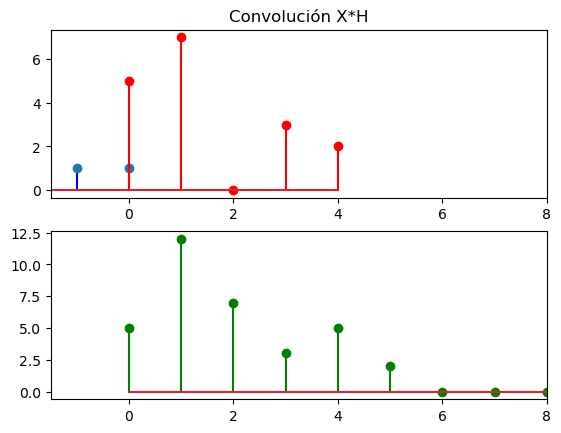

In [3]:
# Función para escalón unitario
def escalon(n):
    
    return 1.*(n>=0)

#Definimos datos
n=np.arange(0,6)
x=[5,7,0,3,2]
h=escalon(n)-escalon(n-2)

#Realizamos gráficos
plt.subplot(211);
plt.title("Convolución X*H")
plt.xlim(-1.5,8)
plt.stem(-n,h,'bo');
plt.stem(x,'r','ro');
plt.subplot(212);
plt.xlim(-1.5,8)
plt.stem(np.convolve(x,h),'g','go');

## Python:
+ Entendiendo cómo se calcula la convolución matemáticamente se puede crear una función en python que permita obtener la convolución de dos señales.
> Para crear una función, primero se debe definir un nombre y qué variables tomará.\
> Sabiendo que el largo de y[n] es la suma de los largos de las dos primeras señales restándole 1, se crea un vector con 0 prealocados.\
> Al ser una sumatoria, se puede utilizar ciclos for que permiten realizar el mismo cálculo con distintos valores.\
> Primero se debe crear un ciclo for para n que tome valores desde 0 hasta el largo de la primera señal que se utilizará en la convolución, es decir, desde n = 0 hasta n = len(x).\
> Luego, dentro de este ciclo for se crea otro ciclo para k, que tomará valores desde 0 hasta el largo de la segunda señal, len(h).\
> Dentro de este ciclo se realiza el cálculo para cada valor que formará parte de y[n].\
> Finalmente, la función devolverá el vector y[n].
+ En la siguiente celda se puede ver la función creada para el cálculo de la convolución.

In [4]:
#Realizando una función para la convolución
def convolucion(x,h):
    y=(len(x)+len(h)-1)*[0]
    for n in range (len(x)):
        for k in range (len(h)):
            y[n+k]+=x[n]*h[k]
    return y    

### Ejemplo:
+ Considerando las mismas señales del ejemplo anterior, se comprueba el funcionamiento de la función.

In [5]:
x=[5,7,0,3,2]
h=[1,4]
convolucion(x,h)

[5, 27, 28, 3, 14, 8]

## Animación convolución
##### Tenemos:
> ##### $ x[n]=a^nu[n] $ con $ 0<a<1 $

> ##### $ h[n]=u[n]-u[n-N] $ donde
>> + ##### $ h[n]=1 $ si $ 0<n<N-1 $
>> + ##### $ h[n]=0 $ en otro caso

##### Por lo que, la convolución será:
> $ y[n]=\sum_{k=-\infty}^{\infty} x[k]h[n-k] $

##### Para la  animación de convolución queremos lograr:
![Convolución](convolucion.png)

In [11]:
# Función para exponencial real
def exponencial(a,n):
    x_n=a**n
    return x_n
    
#Datos a utilizar para mostrar el ejemplo
a=0.8
n=np.arange(0,15,1)
N=5
u_n=escalon(n)
x_n=exponencial(a,n)*u_n
h_n=u_n-escalon(n-N)

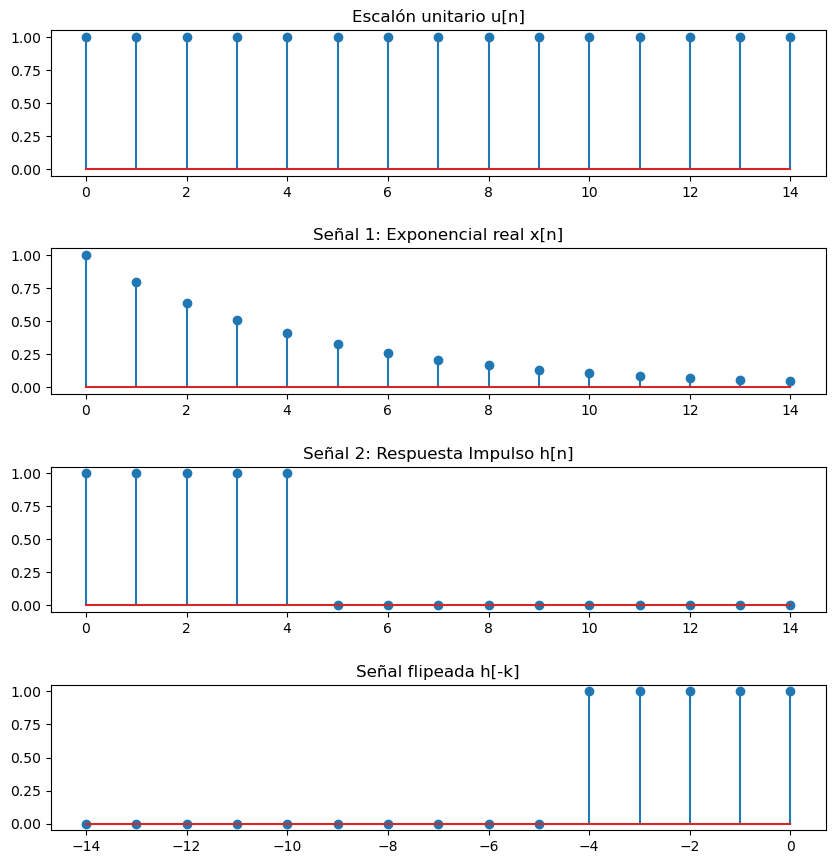

In [12]:
#Gráficos
#u[n]: Escalón unitario
plt.figure(1,figsize=(10,10));
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.9, hspace=0.5) #detalles de los tamaños
plt.subplot(411);
plt.title("Escalón unitario u[n]")
plt.stem(n,u_n);

#x[n]: Exponencial real que quedará fija
plt.subplot(412);
plt.title("Señal 1: Exponencial real x[n]")
plt.stem(n,x_n);

#h[n]: Señal que se flipeará y moverá
plt.subplot(413);
plt.title("Señal 2: Respuesta Impulso h[n]")
plt.stem(n,h_n);

#h[-k]: Señal flipeada que se estará moviendo
plt.subplot(414);
plt.title("Señal flipeada h[-k]")
plt.stem(-n,h_n);

In [13]:
#Creando todos los frames de los gráficos que se solaparán para crear la animación
def anim(step1,step2):
    for i in range(step1,step2,1):
        plt.figure(1,figsize=(12,3));
        plt.title("Animación de convolución")
        plt.stem(n+i,h_n*0);   #Esta línea es para que no se cree un espacio vacío entre ambas gráficas
        plt.stem(-(n-i),h_n);
        plt.stem(n,x_n);
        display.clear_output(wait=True) #Esta línea hace que se produzca la animación, limpiando el cada frame anterior
        time.sleep(0.5) #Esta línea nos permite poner la rápidez de la animación
        plt.show()
    return 

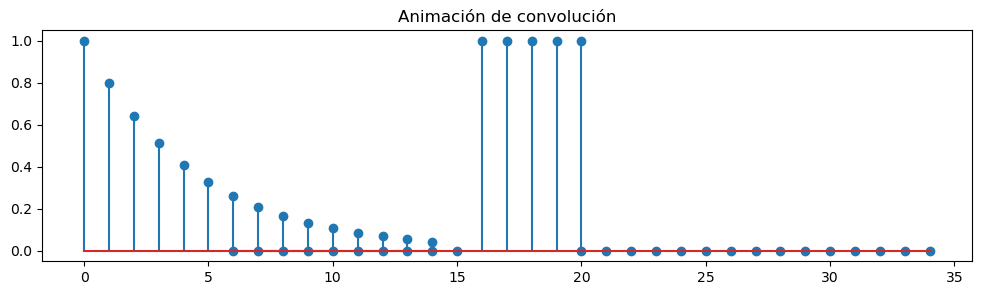

None


In [14]:
#Animación
for i in range(0,2):   #Este ciclo for es para determinar la cantidad de veces que se debe repetir la animación
    print(anim(-4,21))

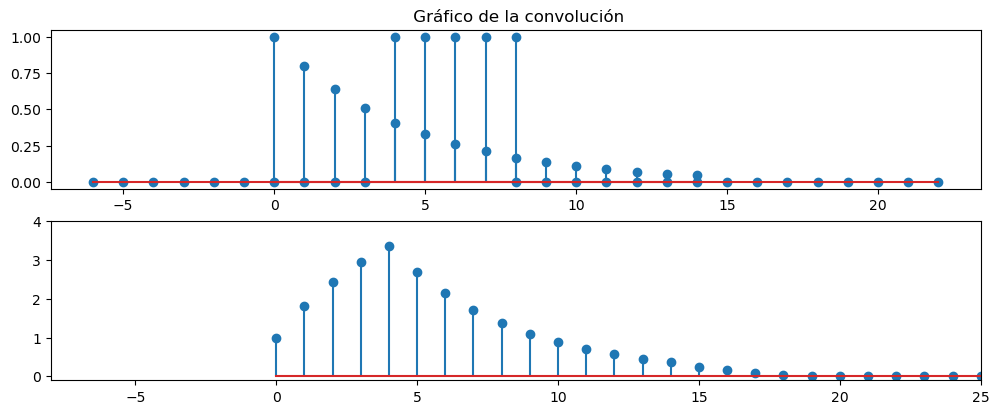

In [10]:
#Resultado de convolución
plt.figure(1,figsize=(12,12));
plt.xlim(-5,25)
plt.subplot(511)
plt.title(" Gráfico de la convolución")
plt.stem(n+8,h_n*0);
plt.stem(-(n-8),h_n);
plt.stem(n,x_n);

plt.subplot(512)
plt.xlim(-8,25)
plt.ylim(-0.1,4)
plt.stem(np.convolve(x_n,h_n));

# Conclusión

# Referencias